In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from attgcn_api import ATTGCN_API
import numpy as np
import matplotlib.pyplot as plt
from py_utils.TSP_loader import TSP_loader
from py_utils.TSP_utils import TSP_plotter
from py_utils.TSP_transformer import TSP_EucTransformer
import torch
print(torch.cuda.is_available())

True


In [ ]:
def create_dir(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

In [ ]:

gcn_api = ATTGCN_API()
gcn_api.init_net()
gcn_api.load_ckpt()
gcn_api.clear_gpu_memory()

Using CUDA!


In [ ]:
NUM_NODES = 10
n_graphs = 1000
path = f'./data/test_sets'
# folder = f'synthetic_nrange_{NUM_NODES}_{NUM_NODES}_{n_graphs}'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [ ]:
NUM_NODES = 50
n_graphs = 1000
path = f'./data/test_sets'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [ ]:
NUM_NODES = 20
n_graphs = 200000
path = f'./data/train_sets'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [ ]:
tsp_loader = TSP_loader()

In [ ]:
g_list = tsp_loader.load_multi_tsp_as_nx(data_dir=f'{path}/{folder}', scale_factor=0.000001, start_index=0)

100%|██████████| 1000/1000 [00:01<00:00, 508.86it/s]


In [ ]:
def load_tsp_solution(sol_filepath):
    solutions = []
    for line in open(sol_filepath):
        solution = line.split(':')[-1].strip(' ').strip('\n').strip('[]')
        solution.replace(' ', '')
        solution = [int(node) for node in solution.split(',')]
        solutions.append(solution)
    return solutions

In [ ]:
gcn_api.load_nx_test_set(graph_list=g_list, num_nodes=NUM_NODES)

In [ ]:
result_ = gcn_api.run_test(batch_size=100)

  0%|          | 0/10 [00:00<?, ?it/s]attgcn_preprocessor/utils/test_utils.py:128: RuntimeWarning: invalid value encountered in true_divide
  edges_probs_norm = edges_probs / np.reshape(np.sum(edges_probs, axis=1), newshape=(node_num, 1))
100%|██████████| 10/10 [00:02<00:00,  3.41it/s]


In [ ]:
g_list = tsp_loader.load_multi_tsp_as_nx(data_dir=f'{path}/{folder}', scale_factor=0.000001, start_index=0)
gcn_api.load_nx_test_set(graph_list=g_list, num_nodes=NUM_NODES)
result = gcn_api.run_test(batch_size=100)
save_path = f'{path}/{folder}/heatmaps'
create_dir(save_path)
file_name = f'{folder}_heatmaps.npy'
np.save(file=f'{save_path}/{file_name}', arr=np.array(result))

  0%|          | 0/10 [00:00<?, ?it/s]attgcn_preprocessor/utils/test_utils.py:128: RuntimeWarning: invalid value encountered in true_divide
  edges_probs_norm = edges_probs / np.reshape(np.sum(edges_probs, axis=1), newshape=(node_num, 1))
100%|██████████| 10/10 [00:02<00:00,  3.55it/s]


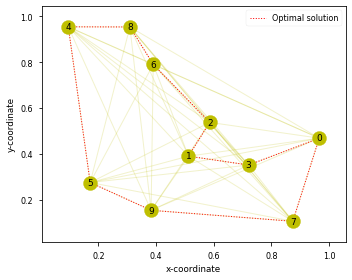

In [ ]:
index = 0
graph = g_list[index]
all_solutions = load_tsp_solution(sol_filepath=f'{path}/{folder}/solutions.txt')
solution = all_solutions[index]
tsp_plotter = TSP_plotter()
tsp_plotter.plot_nx_graph(graph, solution=solution, edge_probs=None, save_path=None)